In [1]:
%matplotlib inline

In [2]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime, date
import timeit
from collections import defaultdict, OrderedDict
import tabulate
import time
import glob
import gmpy2
from functools import reduce

timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""

matplotlib.style.use('ggplot')

RANDOM_SEED = 33

# Question 3.2: Example graphs

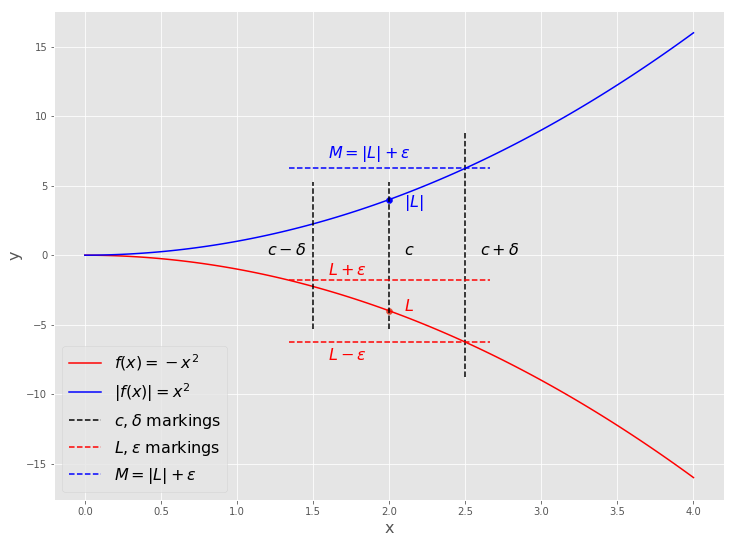

In [3]:
x = np.linspace(0, 4, 100)

plt.figure(figsize=(12, 9))
plt.plot(x, - (x ** 2), label='$f(x) = -x^2$', color='red')
plt.plot(x, (x ** 2), label='$|f(x)| = x^2$', color='blue')

plt.scatter(2, -4)
plt.text(2.1, -4, "$L$", fontsize=16, color='red')

plt.scatter(2, 4, color='blue')
plt.text(2.1, 3.5, "$|L|$", fontsize=16, color='blue')

plt.axvline(2, ymin=0.35, ymax=0.65, color='black', ls='--', label=r'$c,\delta$ markings')
plt.text(2.1, 0, r"$c$", fontsize=16, color='black')

plt.axvline(1.5, ymin=0.35, ymax=0.65, color='black', ls='--')
plt.text(1.2, 0, r"$c - \delta$", fontsize=16, color='black')

plt.axvline(2.5, ymin=0.25, ymax=0.75, color='black', ls='--')
plt.text(2.6, 0, r"$c + \delta$", fontsize=16, color='black')

plt.axhline(-6.25, xmin=0.35, xmax=0.65, color='red', ls='--', label=r'$L,\epsilon$ markings')
plt.text(1.6, -7.5, r"$L - \epsilon$", fontsize=16, color='red')

plt.axhline(-1.75, xmin=0.35, xmax=0.65, color='red', ls='--')
plt.text(1.6, -1.4, r"$L + \epsilon$", fontsize=16, color='red')

plt.axhline(6.25, xmin=0.35, xmax=0.65, color='blue', ls='--', label=r'$M = |L| +\epsilon$')
plt.text(1.6, 7, r"$M = |L| + \epsilon$", fontsize=16, color='blue')

plt.legend(loc=3, fontsize=16)
plt.xlabel('x', size=16)
plt.ylabel('y' , size=16)
plt.show()

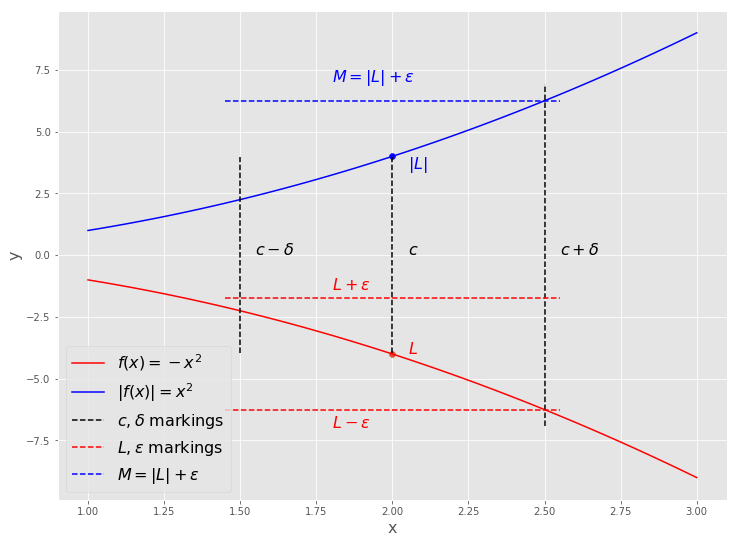

In [4]:
x = np.linspace(1, 3, 100)

plt.figure(figsize=(12, 9))
plt.plot(x, - (x ** 2), label='$f(x)= -x^2$', color='red')
plt.plot(x, (x ** 2), label='$|f(x)| = x^2$', color='blue')

plt.scatter(2, -4)
plt.text(2.05, -4, "$L$", fontsize=16, color='red')

plt.scatter(2, 4, color='blue')
plt.text(2.05, 3.5, "$|L|$", fontsize=16, color='blue')

plt.axvline(2, ymin=0.3, ymax=0.7, color='black', ls='--', label=r'$c,\delta$ markings')
plt.text(2.05, 0, r"$c$", fontsize=16, color='black')

plt.axvline(1.5, ymin=0.3, ymax=0.7, color='black', ls='--')
plt.text(1.55, 0, r"$c - \delta$", fontsize=16, color='black')

plt.axvline(2.5, ymin=0.15, ymax=0.85, color='black', ls='--')
plt.text(2.55, 0, r"$c + \delta$", fontsize=16, color='black')

plt.axhline(-6.25, xmin=0.25, xmax=0.75, color='red', ls='--', label=r'$L,\epsilon$ markings')
plt.text(1.8, -7, r"$L - \epsilon$", fontsize=16, color='red')

plt.axhline(-1.75, xmin=0.25, xmax=0.75, color='red', ls='--')
plt.text(1.8, -1.4, r"$L + \epsilon$", fontsize=16, color='red')

plt.axhline(6.25, xmin=0.25, xmax=0.75, color='blue', ls='--', label=r'$M = |L| +\epsilon$')
plt.text(1.8, 7, r"$M = |L| + \epsilon$", fontsize=16, color='blue')

plt.legend(loc=3, fontsize=16)
plt.xlabel('x', size=16)
plt.ylabel('y' , size=16)
plt.show()

# Question 5: RSA

In [69]:
def repeated_squares(base, exp, mod, verbose=True, print_steps=True):
    current = base
    indices = [i for i, x in enumerate(bin(exp)[2:][::-1]) if x == '1']
    powers=' + '.join(['2^{ind}'.format(ind=ind) for ind in indices])
    print('{exp} = {powers}'.format(exp=exp, powers=powers))
    
    n = indices[-1]
    components = []
    if 0 in indices:
        if verbose:
            print('{base}^(2^{i}) = {current} (mod {mod})'.format(base=base, i=0, current=current, mod=mod))
        components.append(current)
        
    for i in range(n):
        current = (current ** 2) % mod
        if i + 1 in indices: 
            if verbose:
                print('{base}^(2^{i}) = {current} (mod {mod})'.format(base=base, i=i + 1, current=current, mod=mod))
            components.append(current)
    
    if print_steps:
        print('{base}^({exp}) (mod {mod}) = {base}^({powers}) (mod {mod})'.format(base=base, exp=exp, mod=mod,
                                                      powers=powers))
    
    if print_steps:
        print('= {prod} (mod {mod})'.format(base=base, exp=exp, mod=mod,
                                                      prod=' * '.join([str(x) for x in components])))
    prod = np.product(components)
    if print_steps:
        print('= {prod}(mod {mod})'.format(mod=mod, prod=prod))
    
    result = prod % mod
    if print_steps:
        print('= {result} (mod {mod})'.format(result=result, mod=mod))
        
    return result

def multiple_repeated_squares(base_values, exp, mod):
    return [repeated_squares(base, exp, mod, False, False) for base in base_values]
        
repeated_squares(271, 321, 481)

321 = 2^0 + 2^6 + 2^8
271^(2^0) = 271 (mod 481)
271^(2^6) = 419 (mod 481)
271^(2^8) = 16 (mod 481)
271^(321) (mod 481) = 271^(2^0 + 2^6 + 2^8) (mod 481)
= 271 * 419 * 16 (mod 481)
= 1816784(mod 481)
= 47 (mod 481)


47

In [6]:
def extended_gcd(a, b, verbose=True):
    s = 0
    old_s = 1
    t = 1
    old_t = 0
    r = b
    old_r = a
    
    while r != 0:
        q = old_r // r
        old_r, r = r, old_r - q * r
        old_s, s = s, old_s - q * s
        old_t, t = t, old_t - q * t
        
    if verbose:
        print("Bézout coefficients:", (old_s % b, old_t % b))
        print("greatest common divisor:", old_r)
        print("quotients by the gcd:", (t % b, s % b))
    return old_s % b
    
extended_gcd(629, 3432)

Bézout coefficients: (1997, 263)
greatest common divisor: 1
quotients by the gcd: (2803, 0)


1997

## 5.1 Alice's keypair

In [32]:
alice_p = gmpy2.next_prime(10 ** 12)
alice_q = gmpy2.next_prime(alice_p)
alice_n = alice_p * alice_q
alice_m = (alice_p - 1) * (alice_q - 1)
alice_E = gmpy2.mpz(10007)
alice_D = extended_gcd(alice_E, alice_m)

Bézout coefficients: (mpz(189167582710653942240863), mpz(1000000000098000000000387))
greatest common divisor: 1
quotients by the gcd: (mpz(10007), mpz(0))


Verification of multiplicative inverse:

In [8]:
(alice_E * alice_D) % alice_m

mpz(1)

## 5.2 Bob's keypair

In [33]:
bob_p = gmpy2.next_prime(2 * 10 ** 12)
bob_q = gmpy2.next_prime(bob_p)
bob_n = bob_p * bob_q
bob_m = (bob_p - 1) * (bob_q - 1)
bob_E = gmpy2.mpz(10007)
bob_D = extended_gcd(bob_E, bob_m)

Bézout coefficients: (mpz(1105626061825319076646415), mpz(4000000000247999999997478))
greatest common divisor: 1
quotients by the gcd: (mpz(10007), mpz(0))


In [10]:
(bob_E * bob_D) % bob_m

mpz(1)

In [30]:
text_message = 'Math'
number_message = int.from_bytes(bytes(text_message, 'ascii'), 'big')
number_message.to_bytes(4, 'big')

b'Math'

To sign, Alice raises the message to the power of her private key $D_A$ mod her $n_A$

In [39]:
alice_signed = powers_of_two_mod(number_message, alice_D, alice_n, False)

189167582710653942240863 = 2^0 + 2^1 + 2^2 + 2^3 + 2^4 + 2^6 + 2^9 + 2^10 + 2^12 + 2^18 + 2^19 + 2^21 + 2^22 + 2^24 + 2^26 + 2^27 + 2^29 + 2^35 + 2^39 + 2^41 + 2^42 + 2^43 + 2^45 + 2^47 + 2^49 + 2^52 + 2^55 + 2^56 + 2^57 + 2^59 + 2^62 + 2^63 + 2^65 + 2^66 + 2^67 + 2^75 + 2^77
1298232424^(189167582710653942240863) (mod 1000000000100000000002379) = 1298232424^(2^0 + 2^1 + 2^2 + 2^3 + 2^4 + 2^6 + 2^9 + 2^10 + 2^12 + 2^18 + 2^19 + 2^21 + 2^22 + 2^24 + 2^26 + 2^27 + 2^29 + 2^35 + 2^39 + 2^41 + 2^42 + 2^43 + 2^45 + 2^47 + 2^49 + 2^52 + 2^55 + 2^56 + 2^57 + 2^59 + 2^62 + 2^63 + 2^65 + 2^66 + 2^67 + 2^75 + 2^77) (mod 1000000000100000000002379)
= 1298232424 * 1685407426724915776 * 442521331150251190691451 * 189811051164565805435401 * 686531140182774893162967 * 647086296130853331909729 * 971951348257633239416914 * 851472866753122026424399 * 177574793004741977001445 * 857903709304052724894500 * 213383419618604565237948 * 467298461702809448330314 * 598892609910923179331109 * 8200641400403200642831

To encrypt, Alice raises the message to the power of Bob's public key $E_B$ mod Bob's $n_B$ 

In [40]:
alice_encrypted = powers_of_two_mod(number_message, bob_E, bob_n, False)

10007 = 2^0 + 2^1 + 2^2 + 2^4 + 2^8 + 2^9 + 2^10 + 2^13
1298232424^(10007) (mod 4000000000252000000000369) = 1298232424^(2^0 + 2^1 + 2^2 + 2^4 + 2^8 + 2^9 + 2^10 + 2^13) (mod 4000000000252000000000369)
= 1298232424 * 1685407426724915776 * 544654500705989110296746 * 1786128498738633768244675 * 2209820934021390324966158 * 2786662986321386161946003 * 71769757854911730008657 * 3309414281925522353290743 (mod 4000000000252000000000369)
= 3113331042467825237389627067211443896325106783163465437366459162939573771646967582665892759132231842913195776658408383311231317442792430183335480059523118661343697134028800(mod 4000000000252000000000369)
= 3822189788085587563070213 (mod 4000000000252000000000369)


In [41]:
print('Raw message:', number_message)
print('Alice\'s signed:',  alice_signed)
print('Alice\'s encrypted:', alice_encrypted)

Raw message: 1298232424
Alice's signed: 357879890598344007877978
Alice's encrypted: 3822189788085587563070213


## 5.3 Bob's decryption

To decrypt, Bob raises Alice's encrypted message by his private key $D_B$ mod his $n_B$

In [50]:
bob_decrypted = powers_of_two_mod(alice_encrypted, bob_D, bob_n)

1105626061825319076646415 = 2^0 + 2^1 + 2^2 + 2^3 + 2^9 + 2^10 + 2^11 + 2^14 + 2^19 + 2^20 + 2^22 + 2^23 + 2^27 + 2^28 + 2^33 + 2^36 + 2^37 + 2^42 + 2^43 + 2^44 + 2^45 + 2^46 + 2^48 + 2^53 + 2^54 + 2^55 + 2^56 + 2^57 + 2^59 + 2^60 + 2^69 + 2^73 + 2^75 + 2^77 + 2^78 + 2^79
3822189788085587563070213^(2^0) = 3822189788085587563070213 (mod 4000000000252000000000369)
3822189788085587563070213^(2^1) = 3133286570735442401850480 (mod 4000000000252000000000369)
3822189788085587563070213^(2^2) = 2408862724518825868621330 (mod 4000000000252000000000369)
3822189788085587563070213^(2^3) = 1375892354362833818353234 (mod 4000000000252000000000369)
3822189788085587563070213^(2^9) = 26928327827548283615638 (mod 4000000000252000000000369)
3822189788085587563070213^(2^10) = 2219227309269307606463805 (mod 4000000000252000000000369)
3822189788085587563070213^(2^11) = 3878415775772059033316494 (mod 4000000000252000000000369)
3822189788085587563070213^(2^14) = 3126579796336156961978935 (mod 40000000002520000

To verify the signature, Bob raises Alice's signed message by her public key $E_A$ mod Alice's $n_A$

In [43]:
bob_verification = powers_of_two_mod(alice_signed, alice_E, alice_n)

10007 = 2^0 + 2^1 + 2^2 + 2^4 + 2^8 + 2^9 + 2^10 + 2^13
357879890598344007877978^(2^0) = 357879890598344007877978 (mod 1000000000100000000002379)
357879890598344007877978^(2^1) = 166868804718600833213527 (mod 1000000000100000000002379)
357879890598344007877978^(2^2) = 366002457211164230665536 (mod 1000000000100000000002379)
357879890598344007877978^(2^4) = 843225364462069442840406 (mod 1000000000100000000002379)
357879890598344007877978^(2^8) = 547790126760875176908301 (mod 1000000000100000000002379)
357879890598344007877978^(2^9) = 319972371271849482780070 (mod 1000000000100000000002379)
357879890598344007877978^(2^10) = 707008588863453914774254 (mod 1000000000100000000002379)
357879890598344007877978^(2^13) = 362371213395761791082216 (mod 1000000000100000000002379)
357879890598344007877978^(10007) (mod 1000000000100000000002379) = 357879890598344007877978^(2^0 + 2^1 + 2^2 + 2^4 + 2^8 + 2^9 + 2^10 + 2^13) (mod 1000000000100000000002379)
= 357879890598344007877978 * 1668688047186008332

Bob can now compare the results of his decryption and verification

In [44]:
bob_decrypted == bob_verification

True

Noting they both match, Bob can now decode the ascii numbers back into a string

_Success!_ Bob decrypted and verified the message Alice sent, and it arrived correctly

## 5.4 Tampered message

Generate a tampered message by adding 1 to Alice's encrypted message

In [48]:
tampered_message = alice_encrypted + 1

Bob attempts to decrypt as he did before

In [51]:
tampered_decrypted = powers_of_two_mod(tampered_message, bob_D, bob_n)

1105626061825319076646415 = 2^0 + 2^1 + 2^2 + 2^3 + 2^9 + 2^10 + 2^11 + 2^14 + 2^19 + 2^20 + 2^22 + 2^23 + 2^27 + 2^28 + 2^33 + 2^36 + 2^37 + 2^42 + 2^43 + 2^44 + 2^45 + 2^46 + 2^48 + 2^53 + 2^54 + 2^55 + 2^56 + 2^57 + 2^59 + 2^60 + 2^69 + 2^73 + 2^75 + 2^77 + 2^78 + 2^79
3822189788085587563070214^(2^0) = 3822189788085587563070214 (mod 4000000000252000000000369)
3822189788085587563070214^(2^1) = 2777666146402617527990169 (mod 4000000000252000000000369)
3822189788085587563070214^(2^2) = 3817656376181111157343622 (mod 4000000000252000000000369)
3822189788085587563070214^(2^3) = 3944025171416356647266586 (mod 4000000000252000000000369)
3822189788085587563070214^(2^9) = 3965087151424522261211428 (mod 4000000000252000000000369)
3822189788085587563070214^(2^10) = 1366252587991555886050354 (mod 4000000000252000000000369)
3822189788085587563070214^(2^11) = 3080655108821832340518 (mod 4000000000252000000000369)
3822189788085587563070214^(2^14) = 792808332334871042933596 (mod 4000000000252000000

Bob attempts to verify the signature, as he did before, but will fail:

In [52]:
tampered_decrypted == bob_verification

False

Should Bob attempt to decode the tampered message, it will be meaningless:

In [66]:
num_bytes = math.ceil(math.log2(int(tampered_decrypted)) / 8)
int(tampered_decrypted).to_bytes(10, 'big')

b'\xef\xe9\x9a\x0e\xe4\xb18\xd3\xb0\xe9'